# Ways to deviate from (multivariate) normality

In [2]:
# Load the libraries we'll use
######################################

# Basic numerics
import numpy as np
import scipy as sp
import math

# Suppress certain irrelevant warnings in the graphics libraries
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Data handling
import pandas as pd

# Graphics
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid", {'axes.grid' : False})

Before doing anything else, set the seed of the random number generator. This ensures that subsequent runs will produce the same results, based on the same sequence of pseudorandom numbers.

In [4]:
np.random.seed(29) # Set the seed for the random number generator

Also, make sure we have a directory in which to store figures.

In [6]:
# https://www.tutorialspoint.com/How-can-I-create-a-directory-if-it-does-not-exist-using-Python
import os
if not os.path.exists('Figures'):
    os.makedirs('Figures')

Finally, determine which version of Seaborn we have. This affects some of the drawing commands used below.

In [8]:
seabornVersionStr = sns.__version__
versionStrParts = seabornVersionStr.split('.')

### Univariate distribs look like normals, but joint distribution doesn't

In [10]:
# Generate two lots of normally-distributed numbers
n=10000
z1=np.random.normal(size=(n))
z2=np.random.normal(size=(n))

In [11]:
# Reorganise the data so the smallest values from one sample
# get paired with the largest from the other.
m = math.floor( n / 3 ) # an integer close to 1/3 the number of data points
a1=np.argsort(z1) # builds an index a1 such that z1[a1] is in ascending order
a2=np.argsort(z2)
b2=np.concatenate((a2[(m-1):(-1)],a2[0:m])) 

df=pd.DataFrame(np.column_stack((z1[a1],z2[b2])),columns=['Variable 1','Variable 2'])

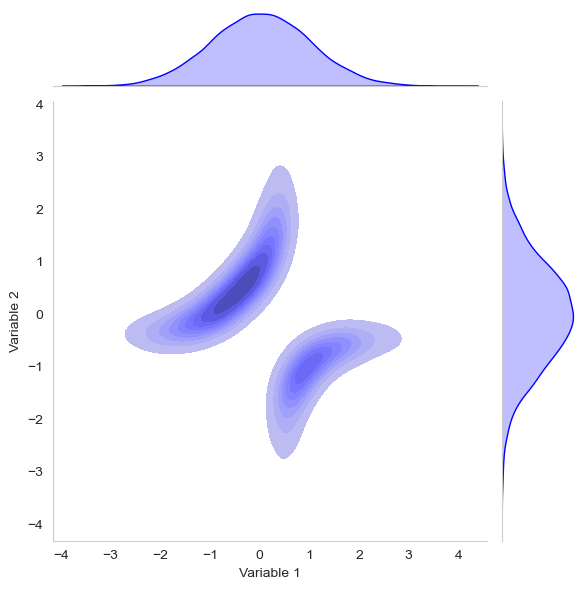

In [12]:
# Use whichever version of Seaborn's graphing commands
# are best suited to the installed version
if( int(versionStrParts[1]) < 11 ):
    # Use the older, now-deprectaed form
    sns.jointplot(x="Variable 1", y="Variable 2",
        data=df, kind='kde', color="b", height=6)
else:
    # Use the more recent form
    sns.jointplot(x="Variable 1", y="Variable 2",
        data=df, kind='kde', color="b", fill=True, height=6)

plt.savefig('Figures/dev_modes.pdf',format='pdf')

In [13]:
n=95
m=5
u1=np.random.normal(size=(n))
u2=np.random.normal(size=(n))
u3=np.random.pareto(1,size=(m))
u4=np.random.pareto(1,size=(m))
z1=np.concatenate((u1,u3))
z2=np.concatenate((u2,u4))

In [14]:
df=pd.DataFrame(np.column_stack((z1,z2)),columns=['Variable 1','Variable 2'])

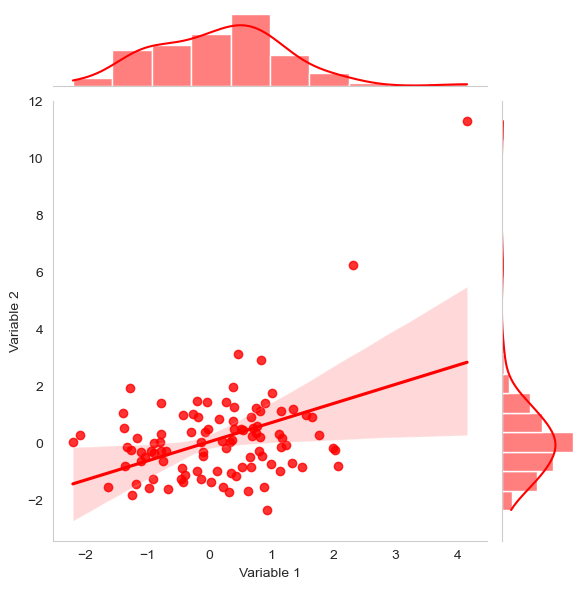

In [15]:
# Here there is no version dependence
sns.jointplot(x="Variable 1", y="Variable 2",
              data=df, kind='reg', color="r", height=6)

plt.savefig('Figures/dev_outlier.pdf',format='pdf')

In [16]:
# Generate a cloud of points, then cut out a strip through the middle
n=40000
u1=np.random.normal(size=(n))
u2=np.random.normal(size=(n))
jj=np.where(np.abs(u1-u2) > 0.2)
z1=u1[jj]
z2=u2[jj]
df=pd.DataFrame(np.column_stack((z1,z2)),columns=['Variable 1','Variable 2'])

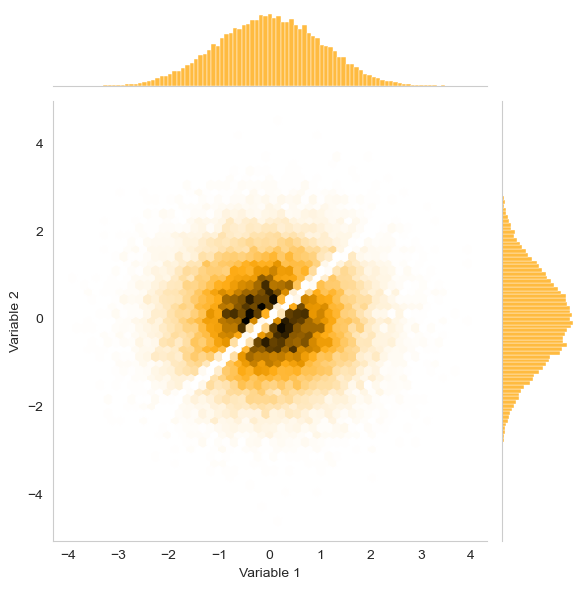

In [17]:
# Here too, the same version of the command works in all
# recent versions of Seaborn
sns.jointplot(x="Variable 1", y="Variable 2",
        data=df, kind='hex', color="Orange", height=6)

plt.savefig('Figures/dev_excluded.pdf',format='pdf')